# Membaca Data

In [27]:
# Import library dari scikit-learn
from sklearn import datasets
import pandas as pd

# Memuat dataset Iris
iris = datasets.load_iris()

# Menampilkan fitur dan target dari dataset Iris
print("Fitur-fitur pada dataset Iris:")
print(iris.feature_names)

print("\nTarget label:")
print(iris.target_names)

# Konversi ke dalam DataFrame agar lebih mudah diolah
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

# Tampilkan beberapa baris pertama dari dataset
print("\nDataframe Iris:")
df_iris.head(5)


Fitur-fitur pada dataset Iris:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target label:
['setosa' 'versicolor' 'virginica']

Dataframe Iris:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


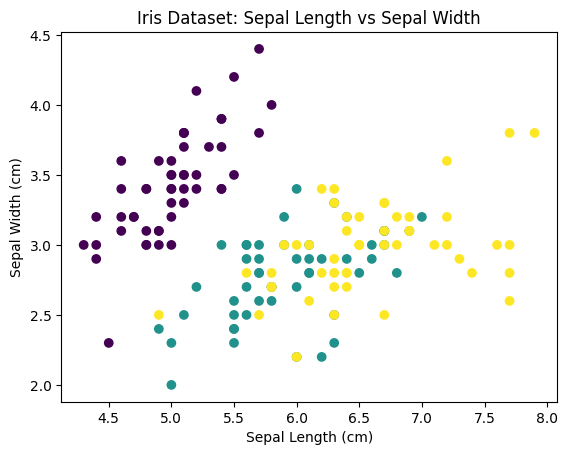

In [28]:
import matplotlib.pyplot as plt

# Memvisualisasikan fitur pertama (sepal length) dan kedua (sepal width)
plt.scatter(df_iris['sepal length (cm)'], df_iris['sepal width (cm)'], c=iris.target, cmap='viridis')

# Menambahkan label pada sumbu
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')

plt.show()


# Step 1: Tentukan jumlah kluster K

In [30]:
K = 3

# Step 2: Inisialisasi Centroid

In [31]:
from sklearn.cluster import KMeans

# Step 2: Inisialisasi centroid (dengan KMeans dari scikit-learn)
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42)

# Step 3: Menghitung Jarak

In [32]:
# Step 3: Menghitung jarak dari setiap titik ke centroid (ini terjadi dalam fit() di KMeans)
kmeans.fit(df_iris.iloc[:, :-1])  # Menggunakan semua fitur kecuali label 'Species'


KMeans(n_clusters=3, random_state=42)

# Step 4: Tetapkan ke Kluster Terdekat

In [33]:
# Step 4: Penetapan ke kluster terdekat (ini dilakukan dalam kmeans.fit)
df_iris['Cluster'] = kmeans.labels_  # Tambahkan kolom hasil klustering

# Step 5: Inisialisasi Ulang Centroid

In [44]:
# Step 5: Inisialisasi ulang centroid (ini juga terjadi di fit KMeans)
# Centroid baru otomatis diupdate selama proses iterasi dalam kmeans.fit

# Melihat posisi centroid setelah klustering
centroids = kmeans.cluster_centers_
print("Centroid dari setiap kluster:\n", centroids)

Centroid dari setiap kluster:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


# Step 6: Cek Konvergensi atau Batas Iterasi

In [35]:
# Step 6: Cek apakah sudah konvergen atau mencapai batas iterasi
# KMeans scikit-learn memiliki parameter max_iter, defaultnya adalah 300
# Konvergensi terjadi jika posisi centroid tidak berubah signifikan

# Step 7: Mengukur Varians (WCSS)

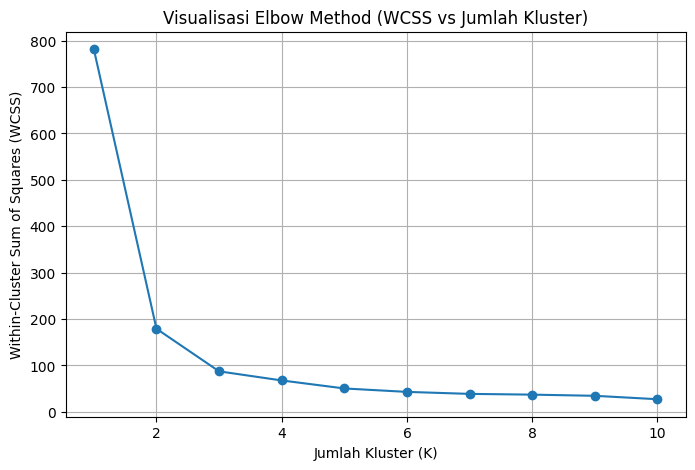

In [46]:
# Menghitung WCSS untuk berbagai nilai K (untuk visualisasi elbow)
wcss = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_iris.iloc[:, :-1])  # Menggunakan fitur tanpa label kluster
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method (WCSS vs Jumlah Kluster)
plt.figure(figsize=(8, 5))
plt.plot(K_values, wcss, marker='o')
plt.title('Visualisasi Elbow Method (WCSS vs Jumlah Kluster)')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Hasil

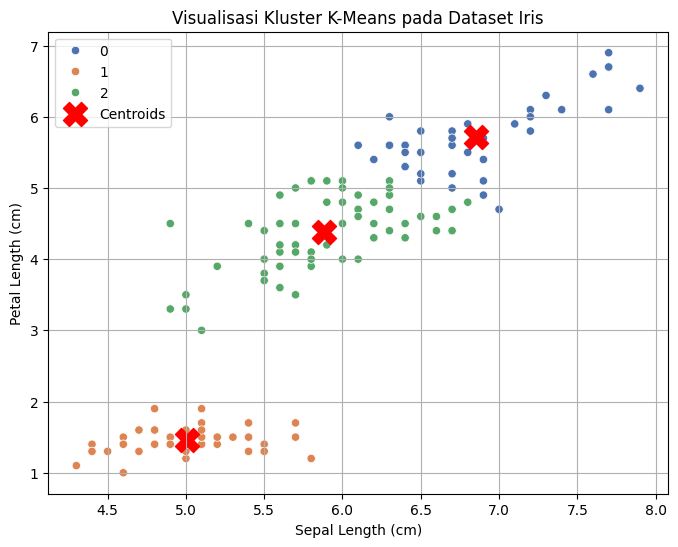

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi hasil K-Means dengan plot scatter
plt.figure(figsize=(8, 6))

# Membuat scatter plot berdasarkan dua fitur
sns.scatterplot(x=df_iris.iloc[:, 0], y=df_iris.iloc[:, 2], hue=df_iris['Cluster'], palette="deep")

# Menambahkan centroid ke dalam plot
plt.scatter(centroids[:, 0], centroids[:, 2], s=300, c='red', label='Centroids', marker='X')

plt.title('Visualisasi Kluster K-Means pada Dataset Iris')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# Menampilkan hasil klustering pada 5 data pertama dengan fitur dan kluster masing-masing
cluster_result = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Cluster']].head(5)

# Menampilkan dataframe
cluster_result


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [39]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Membuat pairplot untuk memvisualisasikan distribusi dan hubungan antar-fitur
# sns.pairplot(df_iris, hue="Cluster", diag_kind="kde", palette="deep")

# # Menambahkan judul ke plot
# plt.suptitle("Pairplot dari Fitur-Fitur pada Dataset Iris dengan Kluster K-Means", y=1.02)
# plt.show()


In [42]:
# import numpy as np

# # Data yang akan divisualisasikan
# cluster = df_iris['Cluster'].head(5)
# pl = df_iris['petal length (cm)'].head(5)
# pw = df_iris['petal width (cm)'].head(5)
# sl = df_iris['sepal length (cm)'].head(5)
# sw = df_iris['sepal width (cm)'].head(5)

# # Membuat bar chart untuk fitur-fitur yang berbeda
# ind = np.arange(5)  # Lokasi bar

# width = 0.2  # Lebar setiap bar

# plt.figure(figsize=(10, 6))

# # Membuat bar untuk setiap fitur
# plt.bar(ind, pl, width, label='Petal Length (cm)', color='blue')
# plt.bar(ind + width, pw, width, label='Petal Width (cm)', color='green')
# plt.bar(ind + 2 * width, sl, width, label='Sepal Length (cm)', color='red')
# plt.bar(ind + 3 * width, sw, width, label='Sepal Width (cm)', color='orange')

# # Menambahkan label dan judul
# plt.xlabel('Sample Index')
# plt.ylabel('Value (cm)')
# plt.title('Visualisasi Fitur-Fitur pada 5 Data Pertama Dataset Iris')
# plt.xticks(ind + width, ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5'])

# plt.legend()
# plt.grid(True)
# plt.show()
